In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from IPython.display import display

In [14]:
#load dataset
df = sns.load_dataset("penguins")
# Drop rows with missing values
df = df.dropna()
display(df)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [15]:
# Feature and label separation
feature = df.drop(columns=["species"])
label = df["species"]

# Convert categorical features
feature = pd.get_dummies(feature)

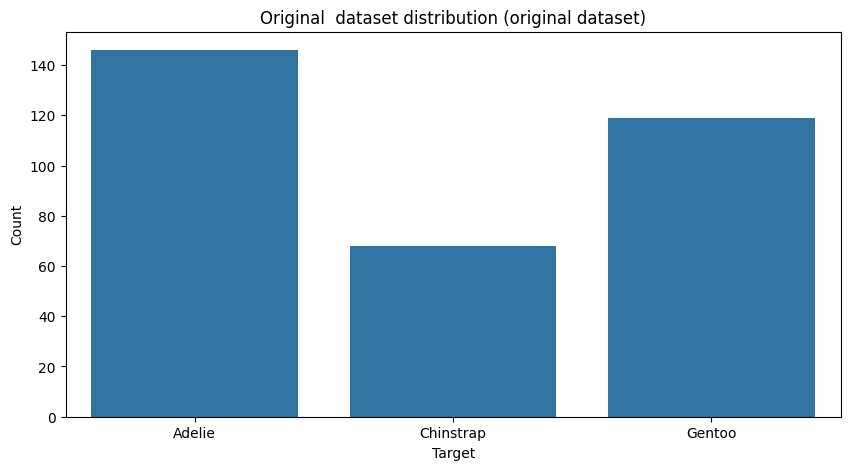

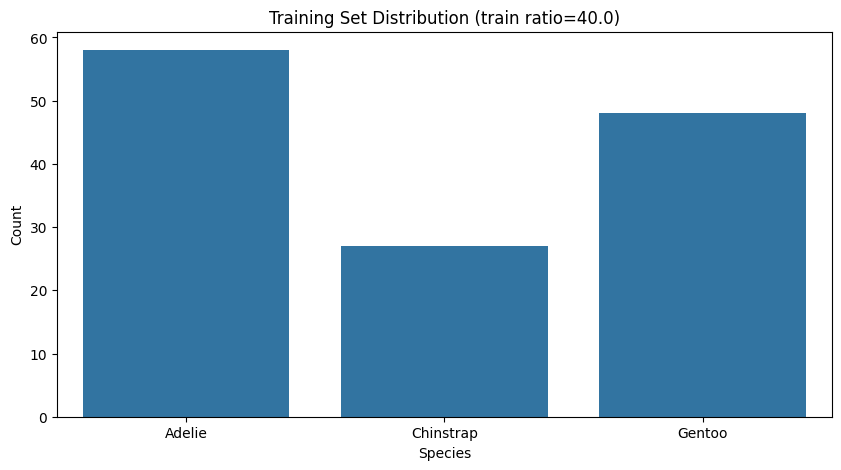

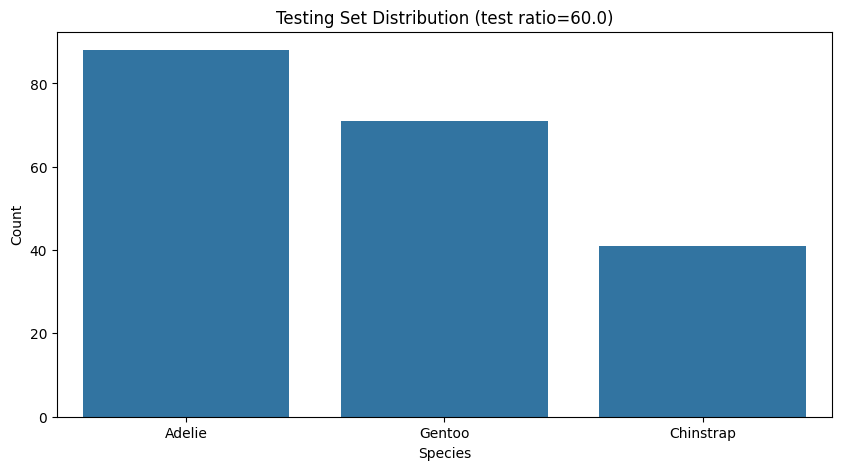

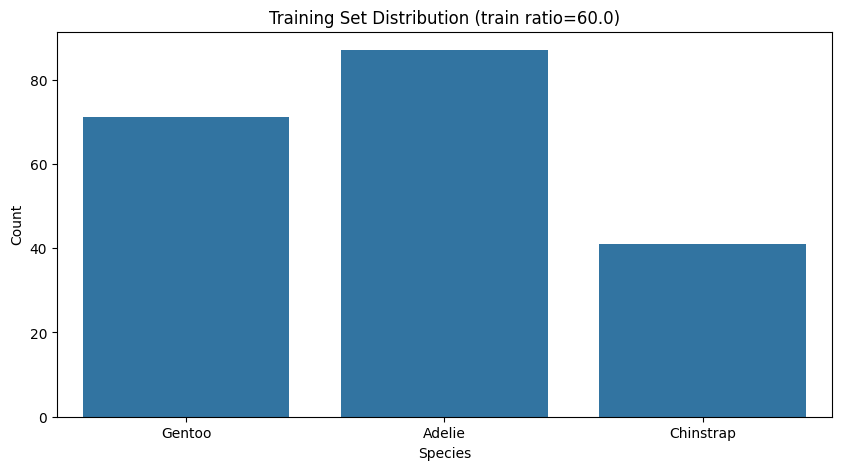

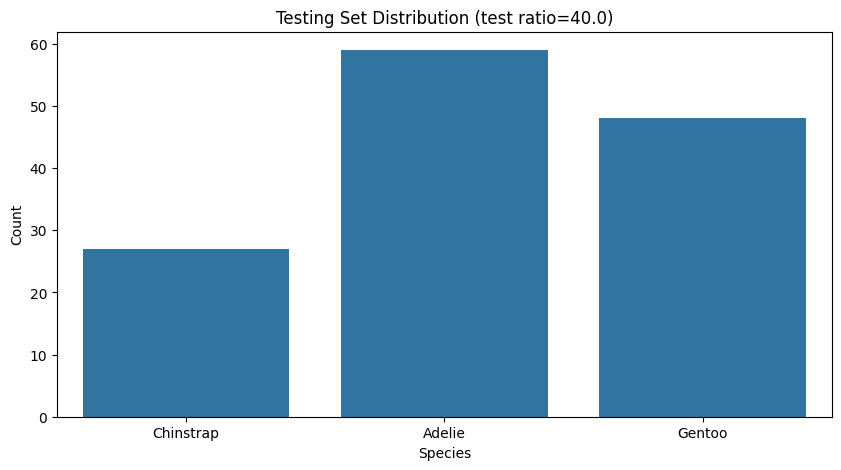

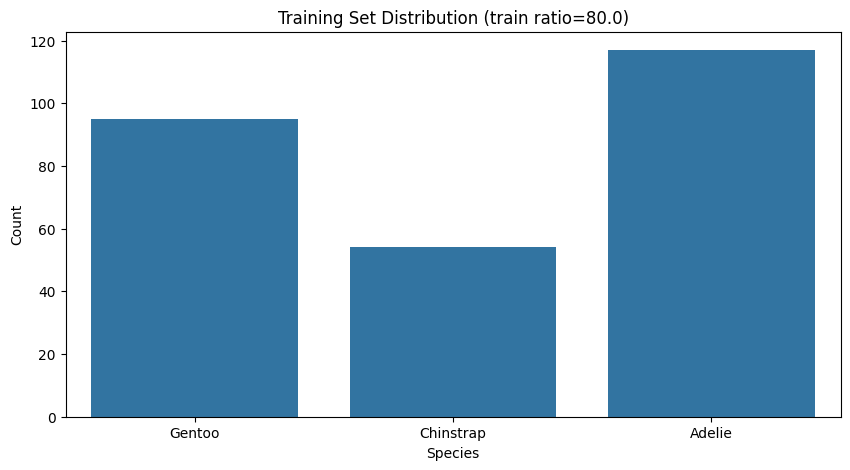

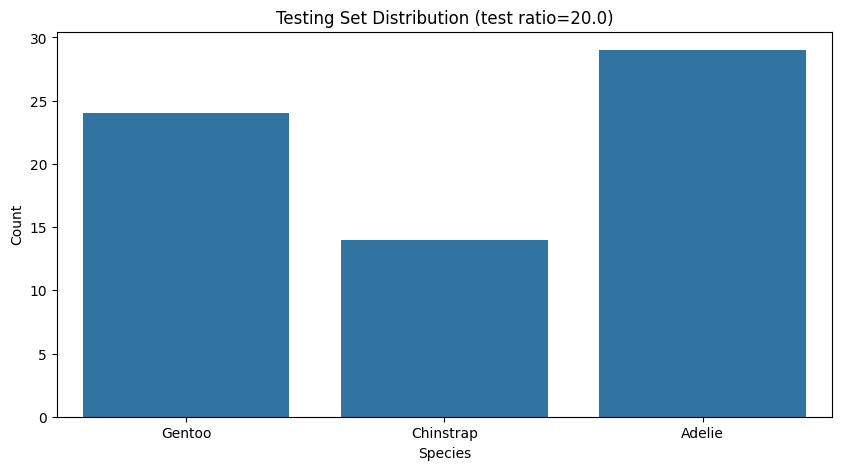

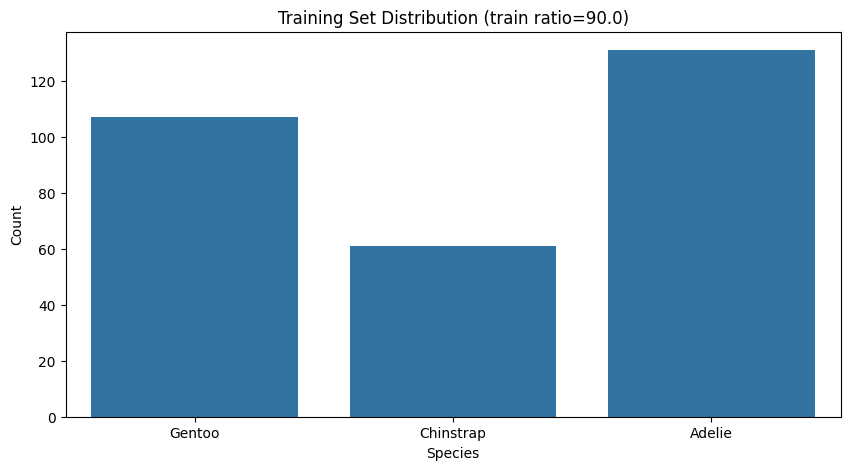

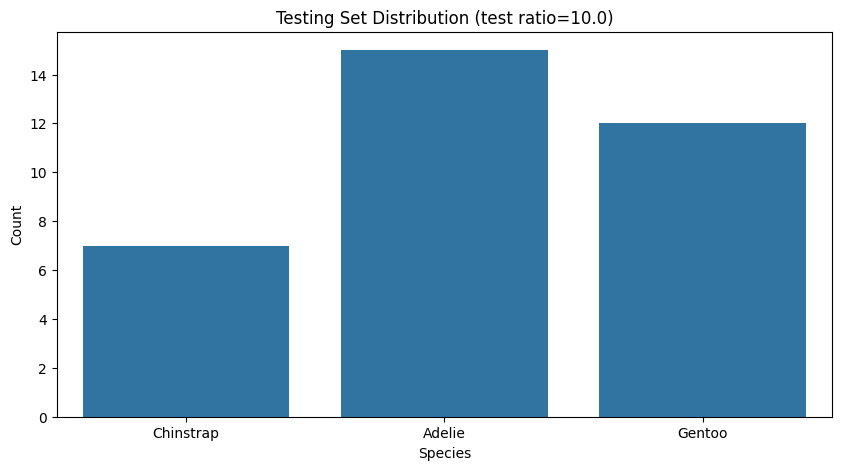

In [16]:
# Train_test_split
plt.figure(figsize=(10, 5))
sns.countplot(x=label)
plt.title(f"Original  dataset distribution (original dataset)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


splits = [0.4, 0.6, 0.8, 0.9]
split_results = {}

for train_ratio in splits:
    feature_train, feature_test, label_train, label_test = train_test_split(
        feature, label, train_size=train_ratio, random_state=42, stratify=label, shuffle=True
    )

    split_results[train_ratio] = {
        "feature_train": feature_train,
        "feature_test": feature_test,
        "label_train": label_train,
        "label_test": label_test
    }

    plt.figure(figsize=(10, 5))
    sns.countplot(x=label_train)
    plt.title(f"Training Set Distribution (train ratio={train_ratio * 100})")
    plt.xlabel("Species")
    plt.ylabel("Count")
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.countplot(x=label_test)
    plt.title(f"Testing Set Distribution (test ratio={100 - train_ratio * 100})")
    plt.xlabel("Species")
    plt.ylabel("Count")
    plt.show()

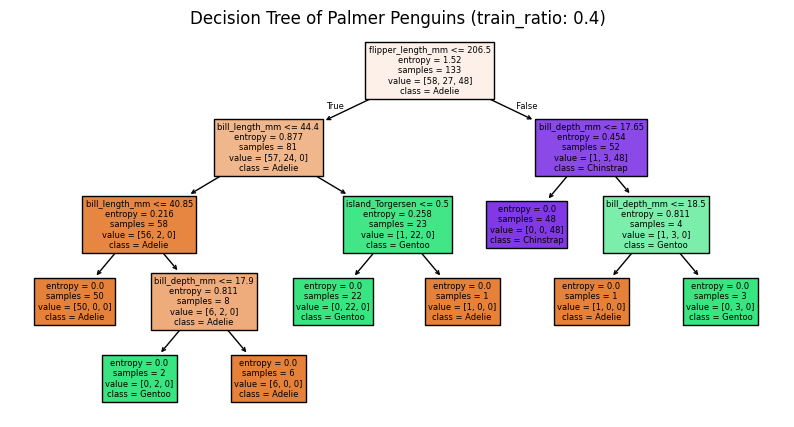

Train ratio: 0.4, Accuracy: 0.96
              precision    recall  f1-score   support

      Adelie       0.99      0.93      0.96        88
   Chinstrap       0.85      0.98      0.91        41
      Gentoo       1.00      0.99      0.99        71

    accuracy                           0.96       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.96      0.96       200



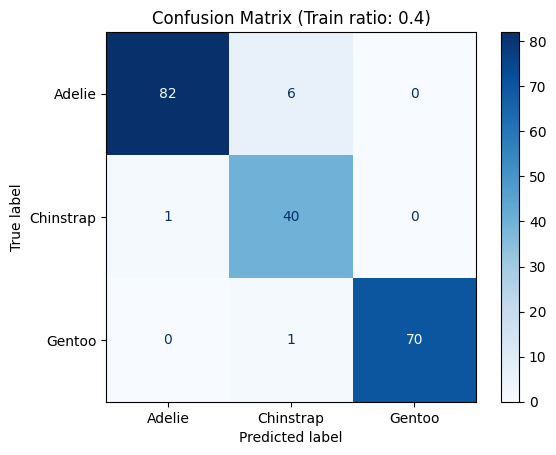

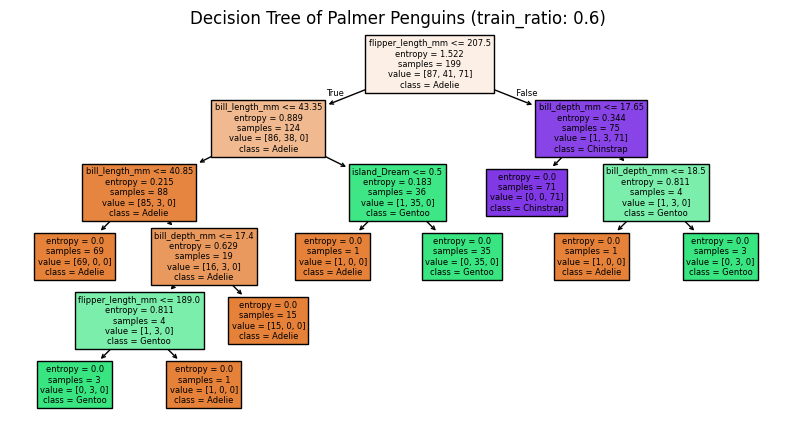

Train ratio: 0.6, Accuracy: 0.9701492537313433
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        59
   Chinstrap       0.93      1.00      0.96        27
      Gentoo       1.00      0.96      0.98        48

    accuracy                           0.97       134
   macro avg       0.97      0.97      0.97       134
weighted avg       0.97      0.97      0.97       134



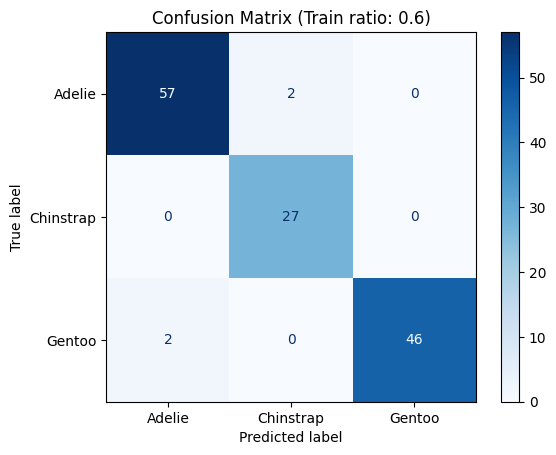

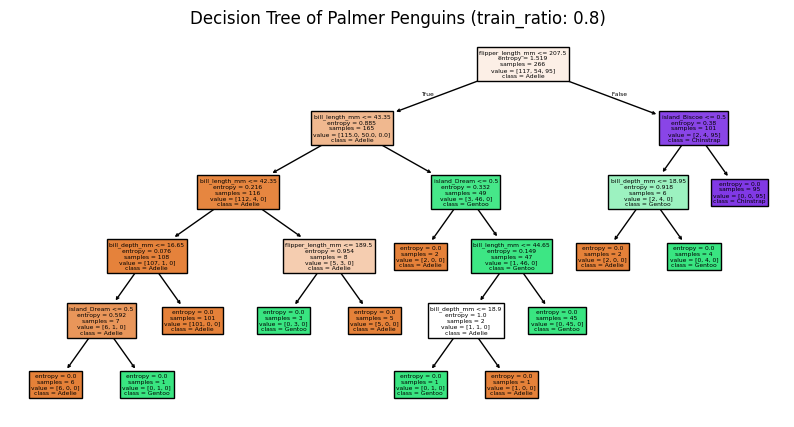

Train ratio: 0.8, Accuracy: 0.9253731343283582
              precision    recall  f1-score   support

      Adelie       0.93      0.90      0.91        29
   Chinstrap       0.82      1.00      0.90        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.93        67
   macro avg       0.92      0.94      0.92        67
weighted avg       0.93      0.93      0.93        67



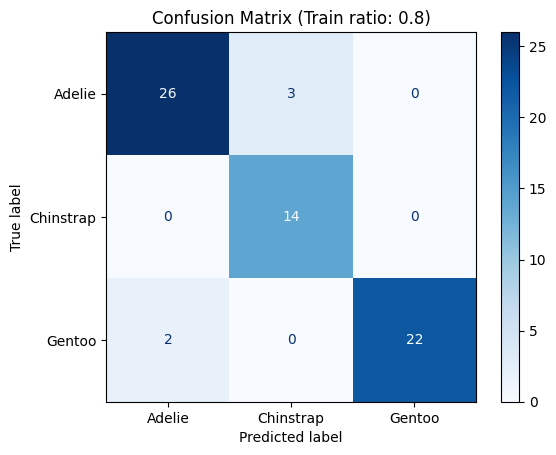

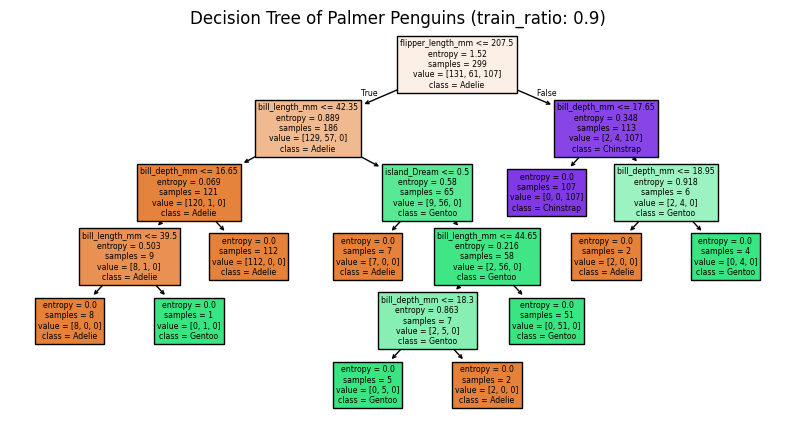

Train ratio: 0.9, Accuracy: 0.9411764705882353
              precision    recall  f1-score   support

      Adelie       0.88      1.00      0.94        15
   Chinstrap       1.00      1.00      1.00         7
      Gentoo       1.00      0.83      0.91        12

    accuracy                           0.94        34
   macro avg       0.96      0.94      0.95        34
weighted avg       0.95      0.94      0.94        34



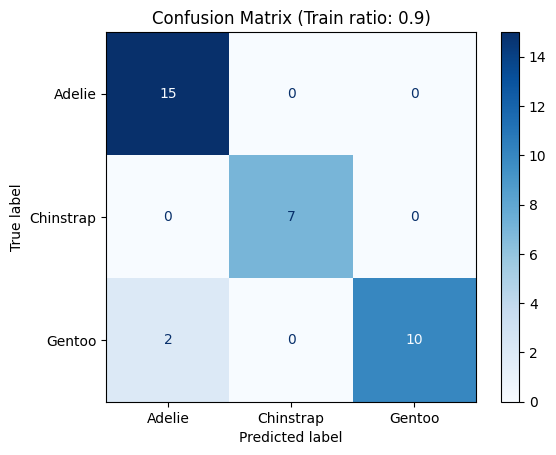

In [17]:
# Decision Tree Classifier
for train_ratio, data in split_results.items():
    feature_train = data["feature_train"]
    feature_test = data["feature_test"]
    label_train = data["label_train"]
    label_test = data["label_test"]

    # Create and train the model
    model = DecisionTreeClassifier(criterion="entropy", random_state=42)
    model.fit(feature_train, label_train)

    # Make predictions
    predictions = model.predict(feature_test)

    # Visualize the decision tree
    plt.figure(figsize=(10, 5))
    plot_tree(model, feature_names=feature.columns, class_names=["Adelie", "Gentoo", "Chinstrap"], filled=True)
    plt.title("Decision Tree of Palmer Penguins (train_ratio: {})".format(train_ratio))
    plt.show()

    # Evaluation
    accuracy = accuracy_score(label_test, predictions)
    print(f"Train ratio: {train_ratio}, Accuracy: {accuracy}")
    print(classification_report(label_test, predictions))

    # Confusion matrix
    cm = confusion_matrix(label_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (Train ratio: {train_ratio})")
    plt.show()

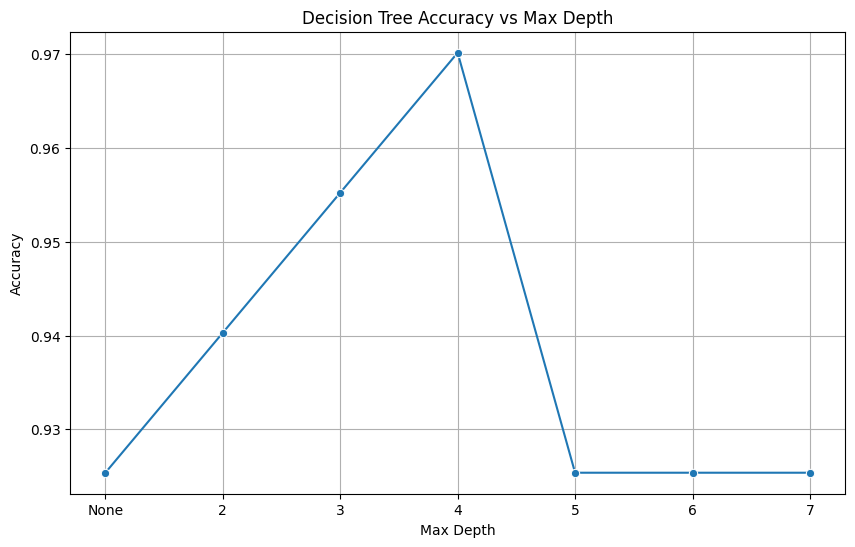

In [18]:
# Analyze accuracy vs max_depth
split_80 = split_results[0.8]
feature_train = split_80["feature_train"]
feature_test = split_80["feature_test"]
label_train = split_80["label_train"]
label_test = split_80["label_test"]

max_depths = [None, 2, 3, 4, 5, 6, 7]
depth_results = []

for max_depth in max_depths:
    model = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=42)
    model.fit(feature_train, label_train)

    prediction = model.predict(feature_test)
    accuracy = accuracy_score(label_test, prediction)

    depth_results.append({  
        "max_depth": str(max_depth),
        "accuracy": accuracy
    })

# Plot accuracy vs max_depth
depth_df = pd.DataFrame(depth_results)
plt.figure(figsize=(10, 6))
sns.lineplot(data=depth_df, x="max_depth", y="accuracy", marker="o")
plt.title("Decision Tree Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid()
plt.show()